In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend. plotting import plot_decision_regions

In [3]:
dataset=pd.read_csv(r"/kaggle/input/social-network-ads/Social_Network_Ads.csv")
dataset.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [7]:
dataset.drop(columns=["Gender"],inplace=True)


In [13]:
dataset.drop(columns=["UserID"],inplace=True)

KeyError: "['UserID'] not found in axis"

In [12]:
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [16]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [17]:
x = dataset.iloc[:,: -1]
y = dataset[ "Purchased" ]

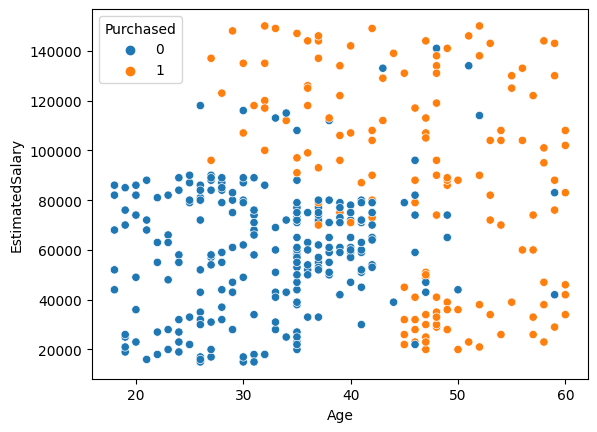

In [18]:
sns. scatterplot(x="Age",y="EstimatedSalary" ,data=dataset, hue="Purchased" )
plt. show()

In [19]:
from sklearn.preprocessing import StandardScaler



In [21]:
sc = StandardScaler()
sc. fit(x)
x = pd. DataFrame(sc. transform(x), columns=x. columns)

In [22]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train , y_test = train_test_split(x,y,random_state=42, test_size=0.2)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3,p=2)
knn. fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
knn. score(x_test,y_test) *100

92.5

In [36]:
knn. score(x_train,y_train) *100

92.5

In [33]:
for i in range (1,30) :
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1. fit(x_train,y_train)
    print(i, knn1. score(x_train,y_train)*100,knn1.score(x_test,y_test)*100)

1 99.6875 85.0
2 91.25 86.25
3 92.5 92.5
4 91.5625 92.5
5 90.9375 92.5
6 90.9375 90.0
7 91.875 93.75
8 90.625 92.5
9 91.25 93.75
10 90.625 92.5
11 90.9375 92.5
12 91.25 92.5
13 91.5625 92.5
14 90.625 92.5
15 90.625 92.5
16 90.0 92.5
17 90.3125 92.5
18 90.0 92.5
19 90.9375 92.5
20 90.0 93.75
21 90.3125 92.5
22 90.0 93.75
23 90.3125 93.75
24 89.375 93.75
25 90.0 93.75
26 89.375 93.75
27 89.375 92.5
28 88.75 93.75
29 88.75 93.75


In [37]:
knn.predict([[-1.781797	,-1.490046]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


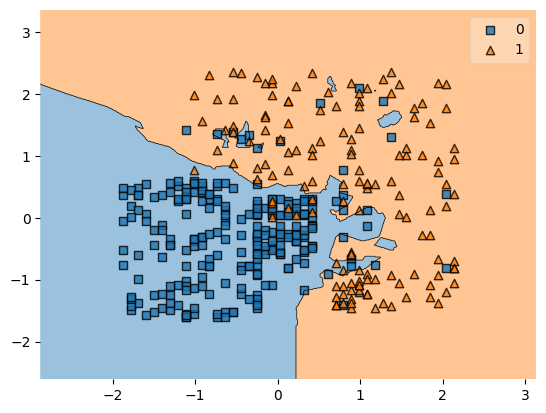

In [41]:
plot_decision_regions (x.to_numpy(),y.to_numpy(), clf=knn)
plt.show()